# Обучаем новые модели

Скачиваем необходимый набор признаков:

In [2]:
import numpy as np
import pandas as pd

from hyperopt import hp

In [3]:
#!gshell download --with-id 1rI5pkdGKSEAVXbjTO3TgeGSocrubkUQl 

In [4]:
#!cp ./features_sdssdr16+psdr2+all_deacls8tr_QSO+GALAXY_20201212133711.pkl ./models/features.pkl
#!rm features_sdssdr16+psdr2+all_deacls8tr_QSO+GALAXY_20201212133711.pkl
#!ls

In [5]:
features_path = '../../models_before_aggregation_j/features.pkl'
column = 'J'
j_features = ['J']

In [6]:
features = pd.read_pickle(features_path) + j_features

In [7]:
sdss_wise = [
                'sdssdr16_u_cmodel-decals8tr_Lw1',
                'sdssdr16_u_cmodel-decals8tr_Lw2',
                'sdssdr16_g_cmodel-decals8tr_Lw1',
                'sdssdr16_g_cmodel-decals8tr_Lw2',
                'sdssdr16_r_cmodel-decals8tr_Lw1',
                'sdssdr16_r_cmodel-decals8tr_Lw2',
                'sdssdr16_i_cmodel-decals8tr_Lw1',
                'sdssdr16_i_cmodel-decals8tr_Lw2',
                'sdssdr16_z_cmodel-decals8tr_Lw1',
                'sdssdr16_z_cmodel-decals8tr_Lw2' 
              ]
sdss_nwise = [
                'sdssdr16_g_cmodel-decals8tr_g',
                'sdssdr16_r_cmodel-decals8tr_r',
                'sdssdr16_z_cmodel-decals8tr_z'
]

ps_decals = [
                'psdr2_g_kron-decals8tr_Lw1',
                'psdr2_g_kron-decals8tr_Lw2',
                'psdr2_r_kron-decals8tr_Lw1',
                'psdr2_r_kron-decals8tr_Lw2',
                'psdr2_i_kron-decals8tr_Lw1',
                'psdr2_i_kron-decals8tr_Lw2',
                'psdr2_z_kron-decals8tr_Lw1',
                'psdr2_z_kron-decals8tr_Lw2',
                'psdr2_y_kron-decals8tr_Lw1',
                'psdr2_y_kron-decals8tr_Lw2'
]


In [8]:
sdss = [i for i in features if 'sdss' in i and 'decals' not in i and column not in i] 
decals = [i for i in features if 'decals' in i and 'sdss' not in i and 'psdr' not in i and column not in i] 
wise = [i for i in decals if 'Lw' in i and column not in i] 
ps = [i for i in features if 'psdr' in i and 'decals' not in i and column not in i]

f0 = {"sdssdr16+wise_decals8tr": sdss+wise+sdss_wise,
     "psdr2+wise_decals8tr": ps+wise+ps_decals,
     "sdssdr16+all_decals8tr": sdss+decals+sdss_wise+sdss_nwise,
     "psdr2+all_decals8tr": ps+decals+ps_decals,
     "decals8tr": decals,
     "sdssdr16+psdr2+wise_decals8tr": sdss+ps+wise+sdss_wise+ps_decals,
     "sdssdr16+psdr2+all_decals8tr": sdss+ps+decals+ps_decals+sdss_wise+sdss_nwise}

In [9]:
features

['sdssdr16_u_psf',
 'sdssdr16_g_psf',
 'sdssdr16_r_psf',
 'sdssdr16_i_psf',
 'sdssdr16_z_psf',
 'sdssdr16_u_cmodel',
 'sdssdr16_i_cmodel',
 'sdssdr16_u-g_psf',
 'sdssdr16_u-r_psf',
 'sdssdr16_u-i_psf',
 'sdssdr16_u-z_psf',
 'sdssdr16_u_psf-cmodel',
 'sdssdr16_g-i_psf',
 'sdssdr16_g_psf-cmodel',
 'sdssdr16_r-i_psf',
 'sdssdr16_i-z_psf',
 'sdssdr16_i_psf-cmodel',
 'sdssdr16_u_cmodel-decals8tr_Lw1',
 'sdssdr16_u_cmodel-decals8tr_Lw2',
 'sdssdr16_g_cmodel-decals8tr_Lw1',
 'sdssdr16_g_cmodel-decals8tr_Lw2',
 'sdssdr16_r_cmodel-decals8tr_Lw1',
 'sdssdr16_r_cmodel-decals8tr_Lw2',
 'sdssdr16_i_cmodel-decals8tr_Lw1',
 'sdssdr16_i_cmodel-decals8tr_Lw2',
 'sdssdr16_z_cmodel-decals8tr_Lw1',
 'sdssdr16_z_cmodel-decals8tr_Lw2',
 'psdr2_i_kron',
 'psdr2_y_kron',
 'psdr2_g_psf',
 'psdr2_r_psf',
 'psdr2_i_psf',
 'psdr2_z_psf',
 'psdr2_y_psf',
 'psdr2_g-i_psf',
 'psdr2_g-y_psf',
 'psdr2_r-i_psf',
 'psdr2_r-y_psf',
 'psdr2_i-z_psf',
 'psdr2_i-y_psf',
 'psdr2_i_psf-kron',
 'psdr2_z-y_psf',
 'psdr2_y_psf-k

In [10]:
sdss_j = [
    'sdssdr16_u_psf',
     'sdssdr16_g_psf',
     'sdssdr16_r_psf',
     'sdssdr16_i_psf',
     'sdssdr16_z_psf',
     'sdssdr16_u_cmodel',
     'sdssdr16_i_cmodel'
]

ps_j = [
    'psdr2_i_kron',
     'psdr2_y_kron',
     'psdr2_g_psf',
     'psdr2_r_psf',
     'psdr2_i_psf',
     'psdr2_z_psf',
     'psdr2_y_psf'
]

wise_j = [
    'decals8tr_Lw1',
     'decals8tr_Lw2'
]

nwise_j = [
    'decals8tr_g',
     'decals8tr_r',
     'decals8tr_z'
]


l = [sdss_j, ps_j, wise_j, nwise_j]

In [11]:
'''
a = ['./data/all_j.pkl_gz']
for i in a:
    df1 = pd.read_pickle(i, compression='gzip')
    for j in l:
        for t in j:
            df1[t + str('-j')] = df1[t] - df1[column]
            
    df1.to_pickle(i[:-7]+'_agr.gz_pkl', compression='gzip')
'''

"\na = ['./data/all_j.pkl_gz']\nfor i in a:\n    df1 = pd.read_pickle(i, compression='gzip')\n    for j in l:\n        for t in j:\n            df1[t + str('-j')] = df1[t] - df1[column]\n            \n    df1.to_pickle(i[:-7]+'_agr.gz_pkl', compression='gzip')\n"

In [12]:
sdss_j = [
    'sdssdr16_u_psf-j',
     'sdssdr16_g_psf-j',
     'sdssdr16_r_psf-j',
     'sdssdr16_i_psf-j',
     'sdssdr16_z_psf-j',
     'sdssdr16_u_cmodel-j',
     'sdssdr16_i_cmodel-j'
]

ps_j = [
    'psdr2_i_kron-j',
     'psdr2_y_kron-j',
     'psdr2_g_psf-j',
     'psdr2_r_psf-j',
     'psdr2_i_psf-j',
     'psdr2_z_psf-j',
     'psdr2_y_psf-j'
]

wise_j = [
    'decals8tr_Lw1-j',
     'decals8tr_Lw2-j'
]

nwise_j = [
    'decals8tr_g-j',
     'decals8tr_r-j',
     'decals8tr_z-j'
]


l = [sdss_j, ps_j, wise_j, nwise_j]

In [13]:
f1 = {"sdssdr16+wise_decals8tr": sdss+wise+sdss_wise+sdss_j+wise_j+j_features,
     "psdr2+wise_decals8tr": ps+wise+ps_decals+ps_j+wise_j+j_features,
     "sdssdr16+all_decals8tr": sdss+decals+sdss_wise+sdss_nwise+sdss_j+wise_j+nwise_j+j_features,
     "psdr2+all_decals8tr": ps+decals+ps_decals+ps_j+wise_j+nwise_j+j_features,
     "decals8tr": decals+wise_j+nwise_j+j_features,
     "sdssdr16+psdr2+wise_decals8tr": sdss+ps+wise+sdss_wise+ps_decals+ps_j+wise_j+sdss_j+j_features,
     "sdssdr16+psdr2+all_decals8tr": sdss+ps+decals+ps_decals+sdss_wise+sdss_nwise+sdss_j+nwise_j+ps_j+wise_j+j_features}

f={'not_j': f0, 'j':f1}

Основные команды для обучения модлей: 

In [14]:
def data_preparation(X, y, c=10000, test_size = 0.8):

    X1_train, X1_test, y1_train, y1_test = train_test_split(X[y==1], y[y==1], test_size=test_size, random_state = 43)
    X2_train, X2_test, y2_train, y2_test = train_test_split(X[y==2], y[y==2], test_size=test_size, random_state = 43)
    X3_train, X3_test, y3_train, y3_test = train_test_split(X[y==3], y[y==3], test_size=test_size, random_state = 43)
    
    count = c
    count1 = c

    X_train, X_test = np.concatenate((X1_train[:count], X2_train[:count], X3_train[:count])), np.concatenate((X1_test[:count1], X2_test[:count1], X3_test[:count1]))
    y_train, y_test = np.concatenate((y1_train[:count], y2_train[:count], y3_train[:count])), np.concatenate((y1_test[:count1], y2_test[:count1], y3_test[:count1]))

    data = np.concatenate((X_train, y_train.reshape((len(y_train), 1))), axis=1)
    np.random.shuffle(data)

    datat = np.concatenate((X_test, y_test.reshape((len(y_test), 1))), axis=1)
    np.random.shuffle(datat)
    

    return data, datat

In [15]:
def data_open(path, features):
    classes = {'STAR': 1, 'QSO':2, 'GALAXY':3}
    with gzip.open(path, 'rb') as f:
        df = pickle.load(f)
    df = df[features + ['class']].dropna()
    X = df[features].values
    y = df.replace({'class':classes}, inplace = True)['class'].values
    return X, y

In [16]:
def scor(y_test, y_pred):
    return accuracy_score(y_test, y_pred)

lgb_reg_params = {
    'min_child_samples':hp.randint('min_child_samples', 80)+1,
    'colsample_bytree': hp.uniform('colsample_bytree', 0.1, 1),
    'num_leaves' :      hp.randint('num_leaves', 100)+10,
    #'min_child_weight': hp.uniform('min_child_weight', 0.001, 0.99),
    'bagging_freq':     hp.randint('bagging_freq', 20),
    'n_estimators':     1000
}
lgb_fit_params = {
    'early_stopping_rounds': 50,
    'verbose': False
}
lgb_para = dict()
lgb_para['reg_params'] = lgb_reg_params
lgb_para['fit_params'] = lgb_fit_params
lgb_para['score'] = lambda y, pred: -accuracy_score(y, pred)


rf_reg_params = {
    'min_samples_leaf': hp.randint('min_samples_leaf', 20)+1,
    'min_samples_split':hp.uniform('min_samples_split', 0.001, 0.1),
    #'max_features':     hp.choice('max_features', ['auto', 'sqrt', 'log2', None]),
    #'learning_rate':    hp.uniform('learning_rate', 0.001, 0.1),
    'n_estimators':     hp.randint('n_estimators', 800)+100
}
rf_fit_params = {
}
rf_para = dict()
rf_para['reg_params'] = rf_reg_params
rf_para['fit_params'] = rf_fit_params
rf_para['score'] = lambda y, pred: -accuracy_score(y, pred)

In [17]:
class HPOpt(object):

    def __init__(self, X, y, cv=3):
        self.X = X
        self.y = y
        self.cv = cv
        #print('init')

    def process(self, fn_name, space, trials, algo, max_evals):
        #print('in process')
        fn = getattr(self, fn_name)
        try:
            #print('try')
            result = fmin(fn=fn, space=space, algo=algo, max_evals=max_evals, trials=trials)
            #print('i can')
        except Exception as e:
            print({'status': STATUS_FAIL,
                    'exception': str(e)})
            return {'status': STATUS_FAIL,
                    'exception': str(e)}
        return result, trials

    def rf_reg(self, para):
        reg = RandomForestClassifier(**para['reg_params'])
        return self.train_reg(reg, para)

    def lgb_reg(self, para):
        reg = lgb.LGBMClassifier(**para['reg_params'])
        if self.cv>1:
            return self.train_cv_gb(reg, para)
        return self.train_reg(reg, para)


    def train_reg(self, reg, para):
        if len(para['fit_params'])>0:
            #print('start')
            reg.fit(self.X, self.y,
                  eval_set=[(self.X, self.y), (self.X, self.y)],
                  **para['fit_params'])
        else:
            reg.fit(self.X, self.y)
        pred = reg.predict(self.X)
        loss = para['score'](self.y, pred)
        return {'loss': loss, 'status': STATUS_OK}


    def train_cv_gb(self, reg, para):
        kf = KFold(n_splits=self.cv, shuffle=False)
        loss = 0 
        for train, test in kf.split(self.X):
            #print('start', type(train[0]), type(test[0]), type(self.y[0]), type(self.X))
            if len(para['fit_params'])>0:
                reg = lgb.LGBMClassifier(**para['reg_params'])
                reg.fit(self.X[train], self.y[train],
                      eval_set=[(self.X[train], self.y[train]), (self.X[test], self.y[test])],
                      **para['fit_params'])
            else:
                reg.fit(self.X[train], self.y[train])
            #print('pred')
            pred = reg.predict(self.X[test])
            score = para['score'](self.y[test], pred)
            loss += score

        loss=loss/self.cv
        return {'loss': loss, 'status': STATUS_OK}

In [17]:
df = pd.read_pickle('./data/all_j_agr.gz_pkl', compression='gzip')
classes = {'STAR': 1, 'QSO':2, 'GALAXY':3}
df.replace({'class':classes}, inplace = True)
df = df.drop_duplicates(subset=['nrow', 'ra', 'dec'])

In [18]:
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, roc_auc_score 
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import joblib
from tqdm.notebook import tqdm
from sklearn.metrics import mean_squared_error, f1_score, accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold

import lightgbm as lgb
from hyperopt import fmin, tpe, STATUS_OK, STATUS_FAIL, Trials

from time import time

In [25]:
acc = pd.DataFrame(index=['not_j', 'j'])

In [26]:
a = '''
zoo_best-x1a_z_pdf
zoo_best-x1a_z_max
zoo_best-x1a_z_maxConf
zoo_best-x1a_z_max_DL_cm
zoo_best-x1a_z_max_Lx
zoo_best-x1a_z_max_Lx_err
zoo_best-x1a_ci1a_68
zoo_best-x1a_ci1b_68
zoo_best-x1a_ci1a_68_DL_cm
zoo_best-x1a_ci1b_68_DL_cm
zoo_best-x1a_ci1a_68_Lx
zoo_best-x1a_ci1b_68_Lx
zoo_best-x1a_ci1a_68_Lx_err
zoo_best-x1a_ci1b_68_Lx_err
zoo_best-x1a_ci1a_90
zoo_best-x1a_ci1b_90
zoo_best-x1a_ci1a_90_DL_cm
zoo_best-x1a_ci1b_90_DL_cm
zoo_best-x1a_ci1a_90_Lx
zoo_best-x1a_ci1b_90_Lx
zoo_best-x1a_ci1a_90_Lx_err
zoo_best-x1a_ci1b_90_Lx_err
zoo_best-x1a_ci1a_95
zoo_best-x1a_ci1b_95
zoo_best-x1a_ci1a_95_DL_cm
zoo_best-x1a_ci1b_95_DL_cm
zoo_best-x1a_ci1a_95_Lx
zoo_best-x1a_ci1b_95_Lx
zoo_best-x1a_ci1a_95_Lx_err
zoo_best-x1a_ci1b_95_Lx_err
'''
a = a.split('\n')[1:-1]

b = '''
zoo_best-x1cv2_0_z_pdf
zoo_best-x1cv2_0_z_max
zoo_best-x1cv2_0_z_maxConf
zoo_best-x1cv2_0_z_max_DL_cm
zoo_best-x1cv2_0_z_max_Lx
zoo_best-x1cv2_0_z_max_Lx_err
zoo_best-x1cv2_0_ci1a_68
zoo_best-x1cv2_0_ci1b_68
zoo_best-x1cv2_0_ci1a_68_DL_cm
zoo_best-x1cv2_0_ci1b_68_DL_cm
zoo_best-x1cv2_0_ci1a_68_Lx
zoo_best-x1cv2_0_ci1b_68_Lx
zoo_best-x1cv2_0_ci1a_68_Lx_err
zoo_best-x1cv2_0_ci1b_68_Lx_err
zoo_best-x1cv2_0_ci1a_90
zoo_best-x1cv2_0_ci1b_90
zoo_best-x1cv2_0_ci1a_90_DL_cm
zoo_best-x1cv2_0_ci1b_90_DL_cm
zoo_best-x1cv2_0_ci1a_90_Lx
zoo_best-x1cv2_0_ci1b_90_Lx
zoo_best-x1cv2_0_ci1a_90_Lx_err
zoo_best-x1cv2_0_ci1b_90_Lx_err
zoo_best-x1cv2_0_ci1a_95
zoo_best-x1cv2_0_ci1b_95
zoo_best-x1cv2_0_ci1a_95_DL_cm
zoo_best-x1cv2_0_ci1b_95_DL_cm
zoo_best-x1cv2_0_ci1a_95_Lx
zoo_best-x1cv2_0_ci1b_95_Lx
zoo_best-x1cv2_0_ci1a_95_Lx_err
zoo_best-x1cv2_0_ci1b_95_Lx_err
'''
b = b.split('\n')[1:-1]

In [27]:
len('zoo_best-x1cv2_0')

16

In [28]:
for i in range(len(a)):
    k = a[i][:11]+a[i][12:]
    df.loc[df['class'] == 1, k] = df.loc[df['class'] == 1, a[i]]
    df.loc[(df['class'] != 1) & (df['fold'] == 0), k] = df.loc[(df['class'] != 1) & (df['fold'] == 0), b[i]]
    df.loc[(df['class'] != 1) & (df['fold'] == 1), k] = df.loc[(df['class'] != 1) & (df['fold'] == 1), b[i][:15]+'1'+b[i][16:]]
    
    
df

,nrow,objID,ra,dec,zspec,zspec_conf,zspec_source,class,subclass,class1,...,zoo_best-x1_ci1a_90_Lx_err,zoo_best-x1_ci1b_90_Lx_err,zoo_best-x1_ci1a_95,zoo_best-x1_ci1b_95,zoo_best-x1_ci1a_95_DL_cm,zoo_best-x1_ci1b_95_DL_cm,zoo_best-x1_ci1a_95_Lx,zoo_best-x1_ci1b_95_Lx,zoo_best-x1_ci1a_95_Lx_err,zoo_best-x1_ci1b_95_Lx_err
0,765558,166771828504836546,182.850396,48.979910,0.046132,-999.0,SDSS,3,STARFORMING,,...,NaN,NaN,-0.023962,0.026538,NaN,NaN,NaN,NaN,NaN,NaN
1,295976,140921926169192374,192.616971,27.434890,0.021385,-999.0,SDSS,3,BROADLINE,,...,NaN,NaN,-0.015042,0.014692,NaN,NaN,NaN,NaN,NaN,NaN
5,267711,153541551169831903,155.117013,37.951053,0.046178,-999.0,SDSS,3,N/A,,...,NaN,NaN,-0.023886,0.025979,NaN,NaN,NaN,NaN,NaN,NaN
6,94182,120741855100415434,185.510020,10.620819,0.025434,-999.0,SDSS,3,STARFORMING,,...,NaN,NaN,-0.017423,0.074669,NaN,NaN,NaN,NaN,NaN,NaN
11,476230,114671598619635888,159.861973,5.562852,0.028537,-999.0,SDSS,3,STARFORMING,,...,NaN,NaN,-0.027526,0.020971,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60414,960359,1237668503831839169,252.083230,50.783279,NaN,NaN,NaN,1,NaN,NaN,...,NaN,NaN,-0.451445,0.228902,NaN,NaN,NaN,NaN,NaN,NaN
60415,960360,1237665583790752642,252.201060,50.891273,NaN,NaN,NaN,1,NaN,NaN,...,NaN,NaN,-0.212508,2.934748,NaN,NaN,NaN,NaN,NaN,NaN
60416,960361,1237665584327361688,252.358160,51.708907,NaN,NaN,NaN,1,NaN,NaN,...,NaN,NaN,-0.855885,1.92245,NaN,NaN,NaN,NaN,NaN,NaN
60417,960362,1237665584327164382,252.128200,52.155919,NaN,NaN,NaN,1,NaN,NaN,...,NaN,NaN,-0.246795,2.79586,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
df.to_pickle('./data/rename_x1_class.pkl_gz', compression='gzip')

In [19]:
df = pd.read_pickle('./data/rename_x1_class.pkl_gz', compression='gzip')
df

,nrow,objID,ra,dec,zspec,zspec_conf,zspec_source,class,subclass,class1,...,zoo_best-x1_ci1a_90_Lx_err,zoo_best-x1_ci1b_90_Lx_err,zoo_best-x1_ci1a_95,zoo_best-x1_ci1b_95,zoo_best-x1_ci1a_95_DL_cm,zoo_best-x1_ci1b_95_DL_cm,zoo_best-x1_ci1a_95_Lx,zoo_best-x1_ci1b_95_Lx,zoo_best-x1_ci1a_95_Lx_err,zoo_best-x1_ci1b_95_Lx_err
0,765558,166771828504836546,182.850396,48.979910,0.046132,-999.0,SDSS,3,STARFORMING,,...,NaN,NaN,-0.023962,0.026538,NaN,NaN,NaN,NaN,NaN,NaN
1,295976,140921926169192374,192.616971,27.434890,0.021385,-999.0,SDSS,3,BROADLINE,,...,NaN,NaN,-0.015042,0.014692,NaN,NaN,NaN,NaN,NaN,NaN
5,267711,153541551169831903,155.117013,37.951053,0.046178,-999.0,SDSS,3,N/A,,...,NaN,NaN,-0.023886,0.025979,NaN,NaN,NaN,NaN,NaN,NaN
6,94182,120741855100415434,185.510020,10.620819,0.025434,-999.0,SDSS,3,STARFORMING,,...,NaN,NaN,-0.017423,0.074669,NaN,NaN,NaN,NaN,NaN,NaN
11,476230,114671598619635888,159.861973,5.562852,0.028537,-999.0,SDSS,3,STARFORMING,,...,NaN,NaN,-0.027526,0.020971,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60414,960359,1237668503831839169,252.083230,50.783279,NaN,NaN,NaN,1,NaN,NaN,...,NaN,NaN,-0.451445,0.228902,NaN,NaN,NaN,NaN,NaN,NaN
60415,960360,1237665583790752642,252.201060,50.891273,NaN,NaN,NaN,1,NaN,NaN,...,NaN,NaN,-0.212508,2.934748,NaN,NaN,NaN,NaN,NaN,NaN
60416,960361,1237665584327361688,252.358160,51.708907,NaN,NaN,NaN,1,NaN,NaN,...,NaN,NaN,-0.855885,1.92245,NaN,NaN,NaN,NaN,NaN,NaN
60417,960362,1237665584327164382,252.128200,52.155919,NaN,NaN,NaN,1,NaN,NaN,...,NaN,NaN,-0.246795,2.79586,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.loc[ (df['zoo_best-x1_z_max']>3) & 
 (df['zoo_best-x1_z_maxConf'])>0.2].to_pickle('./data/weak.pkl_gz', compression='gzip')

Пора пора обучать

In [ ]:
df = pd.read_pickle('./data/weak.pkl_gz', compression='gzip')

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.offline as py
color = sns.color_palette()
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
import plotly.tools as tls

%matplotlib inline

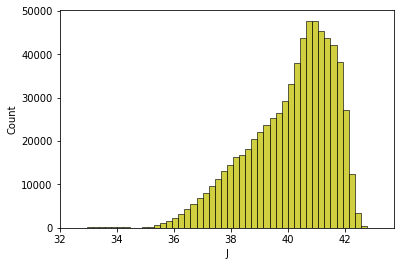

In [21]:
sns.histplot(df['J'], bins = 50, color = 'y')


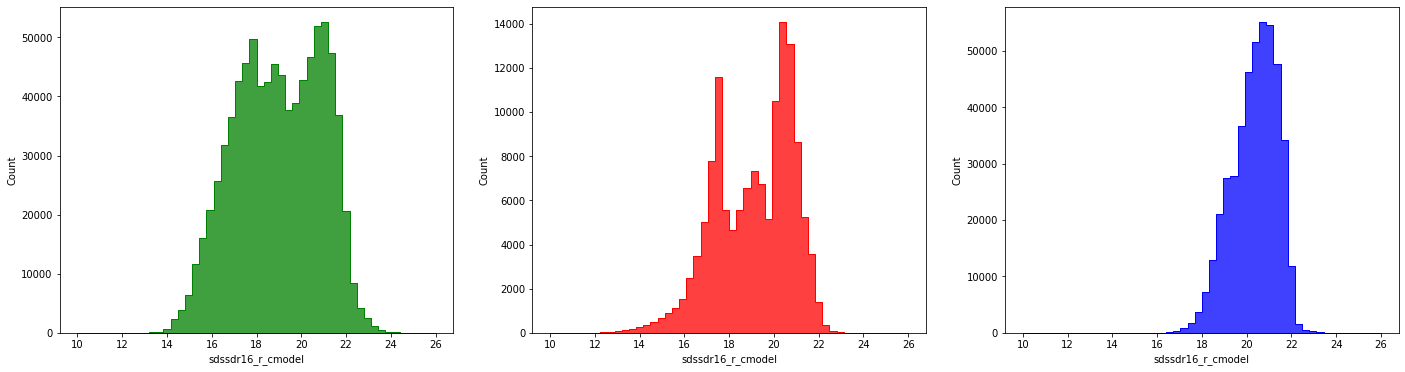

In [22]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize = (24, 6))
sns.histplot(df[df['class']==1]['sdssdr16_r_cmodel'], ax = ax1, bins = 50, color = 'g', element="step", binrange=(10, 26))
sns.histplot(df[df['class']==3]['sdssdr16_r_cmodel'], ax = ax2, bins = 50, color = 'r', element="step", binrange=(10, 26))
sns.histplot(df[df['class']==2]['sdssdr16_r_cmodel'], ax = ax3, bins = 50, color = 'b', element="step", binrange=(10, 26))

In [23]:
sum(df['class']==1), sum(df['class']==2), sum(df['class']==3)

(960363, 449748, 136428)

In [24]:
df.loc[(df['fold'] == 1) & (df['class'] != 1)]

,nrow,objID,ra,dec,zspec,zspec_conf,zspec_source,class,subclass,class1,...,zoo_best-x1_ci1a_90_Lx_err,zoo_best-x1_ci1b_90_Lx_err,zoo_best-x1_ci1a_95,zoo_best-x1_ci1b_95,zoo_best-x1_ci1a_95_DL_cm,zoo_best-x1_ci1b_95_DL_cm,zoo_best-x1_ci1a_95_Lx,zoo_best-x1_ci1b_95_Lx,zoo_best-x1_ci1a_95_Lx_err,zoo_best-x1_ci1b_95_Lx_err
2,126491,124802391855916385,239.185571,14.004871,0.033409,-999.0,SDSS,3,BROADLINE,,...,NaN,NaN,-0.019265,0.031923,NaN,NaN,NaN,NaN,NaN,NaN
3,592858,142041808399524559,180.839921,28.369952,0.026943,-999.0,SDSS,3,STARFORMING,,...,NaN,NaN,-0.014444,0.046398,NaN,NaN,NaN,NaN,NaN,NaN
4,102486,169981694780172322,169.478074,51.651360,0.044492,-999.0,SDSS,3,STARFORMING,,...,NaN,NaN,-0.236377,3.036215,NaN,NaN,NaN,NaN,NaN,NaN
7,288215,105580195052433286,19.505842,-2.013834,0.020094,-999.0,SDSS,3,STARBURST,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,184781,169421624587095724,162.458663,51.187522,0.022277,-999.0,SDSS,3,STARBURST,,...,NaN,NaN,-0.019852,0.037421,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586163,23,NaN,338.229771,29.508976,6.666000,NaN,NaN,2,NaN,NaN,...,NaN,NaN,-1.801508,4.466656,NaN,NaN,NaN,NaN,NaN,NaN
586166,15,NaN,127.383208,41.294556,6.768000,NaN,NaN,2,NaN,NaN,...,NaN,NaN,-1.221842,5.01536,NaN,NaN,NaN,NaN,NaN,NaN
586167,17,NaN,166.089958,21.574667,6.740000,NaN,NaN,2,NaN,NaN,...,NaN,NaN,-1.693247,4.605248,NaN,NaN,NaN,NaN,NaN,NaN
586170,12,NaN,62.869291,-9.130500,6.810000,NaN,NaN,2,NaN,NaN,...,NaN,NaN,-5.905475,0.564834,NaN,NaN,NaN,NaN,NaN,NaN


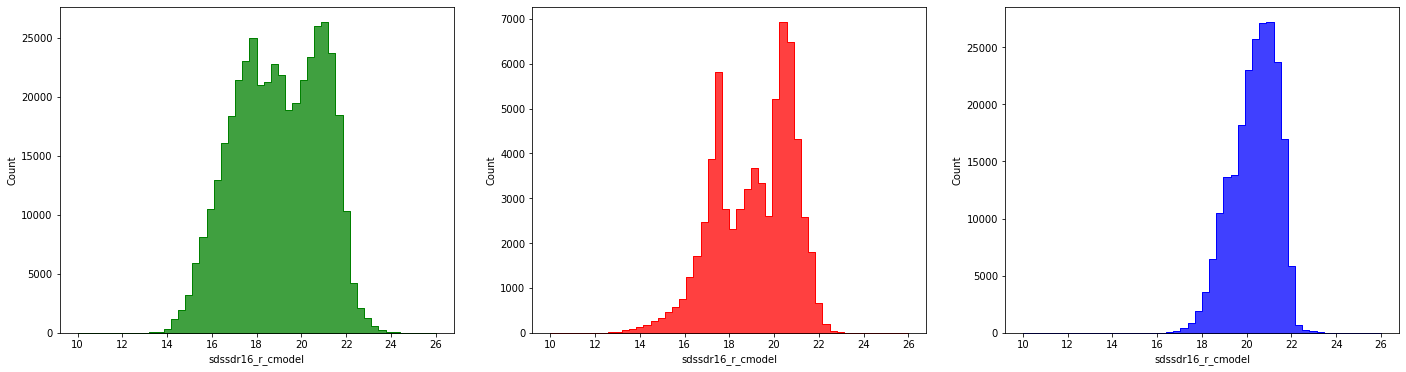

In [25]:
fold = 0
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize = (24, 6))
sns.histplot(df.loc[(df['class']==1) & (df['fold']==fold)]['sdssdr16_r_cmodel'], ax = ax1, bins = 50, color = 'g', element="step", binrange=(10, 26))
sns.histplot(df.loc[(df['class']==3) & (df['fold']==fold)]['sdssdr16_r_cmodel'], ax = ax2, bins = 50, color = 'r', element="step", binrange=(10, 26))
sns.histplot(df.loc[(df['class']==2) & (df['fold']==fold)]['sdssdr16_r_cmodel'], ax = ax3, bins = 50, color = 'b', element="step", binrange=(10, 26))

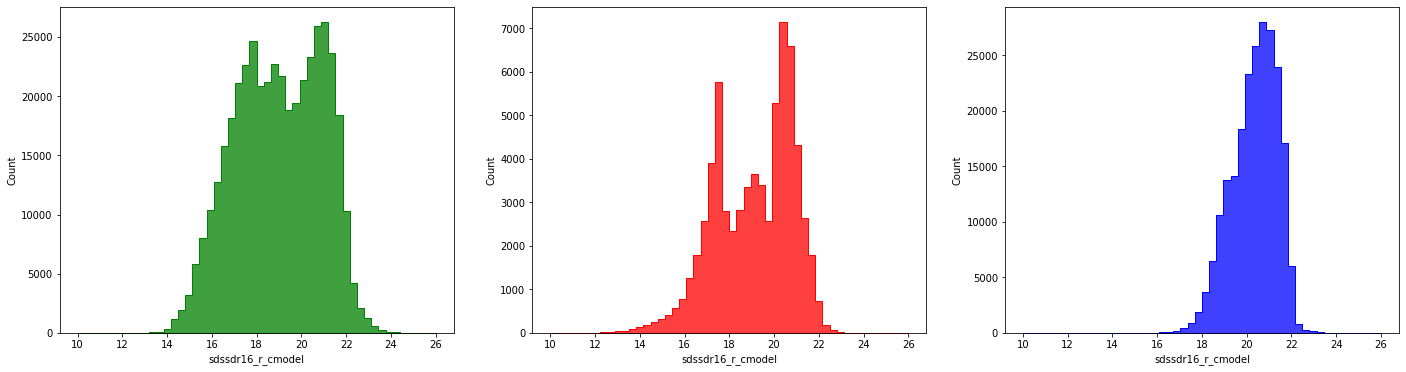

In [26]:
fold = 1
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize = (24, 6))
sns.histplot(df.loc[(df['class']==1) & (df['fold']==fold)]['sdssdr16_r_cmodel'], ax = ax1, bins = 50, color = 'g', element="step", binrange=(10, 26))
sns.histplot(df.loc[(df['class']==3) & (df['fold']==fold)]['sdssdr16_r_cmodel'], ax = ax2, bins = 50, color = 'r', element="step", binrange=(10, 26))
sns.histplot(df.loc[(df['class']==2) & (df['fold']==fold)]['sdssdr16_r_cmodel'], ax = ax3, bins = 50, color = 'b', element="step", binrange=(10, 26))

In [ ]:
variants = ['not_j', 'j']
for mod in variants:
    for overview in f[mod].keys():
        print(overview)
        df1 = df[f[mod][overview] + j_features*(mod == 'j')+['class']].dropna()
        X, y = df1[f[mod][overview] + j_features*(mod == 'j')].values, df1['class'].values
        data, datat = data_preparation(X, y, test_size=0.3, c=50000)
        print(data.shape, datat.shape)

        X1, y1 = data[:, :-1], data[:, -1].astype('int')
        X2, y2 = datat[:, :-1], datat[:, -1].astype('int')
        robust = RobustScaler()

        X_train_norm = robust.fit_transform(X1)
        X_test_norm = robust.transform(X2)
        y_train = y1
        y_test = y2

        obj = HPOpt(X_train_norm, y_train, cv=3)
        lgb_opt = obj.process(fn_name='lgb_reg', space=lgb_para, trials=Trials(), algo=tpe.suggest, max_evals=50)
        print(lgb_opt)
        gb = lgb.LGBMClassifier( 
                                    **{'colsample_bytree': lgb_opt[0]['colsample_bytree'],
                                      'min_child_samples': lgb_opt[0]['min_child_samples']+1,
                                      #'min_child_weight': lgb_opt[0]['min_child_weight'],
                                      'num_leaves': lgb_opt[0]['num_leaves']+10,
                                      'bagging_freq':lgb_opt[0]['bagging_freq'],
                                      'n_estimators': 1000
                                      }
                                  )
        t = time()
        gb.fit(X_train_norm, y_train, eval_set=[(X_train_norm, y_train), (X_test_norm, y_test)],  **lgb_fit_params)
        print(time()-t)
        gb_test_acc = accuracy_score(y_test, gb.predict(X_test_norm))
        acc.loc[mod, overview] = gb_test_acc
        print(acc)
        joblib.dump(gb, './models/'+mod+'/model_'+overview+'.pkl')
        joblib.dump(f[mod][overview] + j_features*(mod == 'j'), './models/'+mod+'/features_'+overview+'.pkl')
        joblib.dump(robust, './models/'+mod+'/'+overview+'_robust_for_gb.pkl')


sdssdr16+wise_decals8tr
(150000, 31) (140929, 31)
  4%|▍         | 2/50 [00:41<17:57, 22.45s/trial, best loss: -0.96684]           

In [ ]:
acc

In [27]:
def create_path(path):
    import os
    try:
        os.makedirs(path)
    except FileExistsError:
        print("Директория %s уже существует" % path) 
    except OSError:
        print ("Создать директорию %s не удалось" % path)
        return 1
    return 0

In [34]:
f[mod].keys()

dict_keys(['sdssdr16+wise_decals8tr', 'psdr2+wise_decals8tr', 'sdssdr16+all_decals8tr', 'psdr2+all_decals8tr', 'decals8tr', 'sdssdr16+psdr2+wise_decals8tr', 'sdssdr16+psdr2+all_decals8tr'])

In [36]:
variants = ['not_j', 'j']
folds=[0, 1]
for fold in folds:
    for mod in ['j']:#variants:
        
        path = 'models'+str(fold)+'/'+mod
        if create_path(path):
            raise Exception('Некуда писать')
            
        for overview in ['sdssdr16+psdr2+all_decals8tr']:#f[mod].keys():
            print(overview)
            
            df1 = df[df['fold'] == fold] 
            df1 = df1[f[mod][overview]+['class']].dropna()
            print(len(f[mod][overview]))
            
            X, y = df1[f[mod][overview]].values, df1['class'].values
            data, datat = data_preparation(X, y, test_size=0.2, c=50000)
            print(data.shape, datat.shape)

            X1, y1 = data[:, :-1], data[:, -1].astype('int')
            X2, y2 = datat[:, :-1], datat[:, -1].astype('int')
            robust = RobustScaler()

            X_train_norm = robust.fit_transform(X1)
            X_test_norm = robust.transform(X2)
            y_train = y1
            y_test = y2

            obj = HPOpt(X_train_norm, y_train, cv=3)
            lgb_opt = obj.process(fn_name='lgb_reg', space=lgb_para, trials=Trials(), algo=tpe.suggest, max_evals=50)
            print(lgb_opt)
            gb = lgb.LGBMClassifier( 
                                        **{'colsample_bytree': lgb_opt[0]['colsample_bytree'],
                                          'min_child_samples': lgb_opt[0]['min_child_samples']+1,
                                          #'min_child_weight': lgb_opt[0]['min_child_weight'],
                                          'num_leaves': lgb_opt[0]['num_leaves']+10,
                                          'bagging_freq':lgb_opt[0]['bagging_freq'],
                                          'n_estimators': 1000
                                          }
                                      )
            t = time()
            gb.fit(X_train_norm, y_train, eval_set=[(X_train_norm, y_train), (X_test_norm, y_test)],  **lgb_fit_params)
            print(time()-t)
            gb_test_acc = accuracy_score(y_test, gb.predict(X_test_norm))
            #acc.loc[mod, overview] = gb_test_acc
            print(gb_test_acc)
            joblib.dump(gb, path +'/model_'+overview+'.pkl')
            joblib.dump(f[mod][overview], path +'/features_'+overview+'.pkl')
            joblib.dump(robust, path +'/'+overview+'_robust_for_gb.pkl')


Директория models0/j уже существует
sdssdr16+psdr2+all_decals8tr
85
(131411, 86) (62981, 86)
100%|██████████| 50/50 [14:20<00:00, 17.21s/trial, best loss: -0.9865840810667709]
({'bagging_freq': 10, 'colsample_bytree': 0.5333224387649693, 'min_child_samples': 30, 'num_leaves': 33}, <hyperopt.base.Trials object at 0x7fe8a18c92d0>)
6.52418851852417
0.9873453898794875
Директория models1/j уже существует
sdssdr16+psdr2+all_decals8tr
85
(132013, 86) (63169, 86)
100%|██████████| 50/50 [14:40<00:00, 17.60s/trial, best loss: -0.9863422529653825]
({'bagging_freq': 9, 'colsample_bytree': 0.2648517259490172, 'min_child_samples': 54, 'num_leaves': 8}, <hyperopt.base.Trials object at 0x7fe8a1f15590>)
7.816787242889404
0.9866548465228198


In [49]:
gb 

LGBMClassifier(bagging_freq=12, boosting_type='gbdt', class_weight=None,
               colsample_bytree=0.4730558789385599, importance_type='split',
               learning_rate=0.1, max_depth=-1, min_child_samples=37,
               min_child_weight=0.001, min_split_gain=0.0, n_estimators=1000,
               n_jobs=-1, num_leaves=70, objective=None, random_state=None,
               reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [52]:
joblib.dump(gb, './models'+str(fold)+'/'+mod+'/model_'+overview+'.pkl')

['./models0/not_j/model_sdssdr16+wise_decals8tr.pkl']

In [51]:
!ls

data  Обучаем модели.ipynb  Открываем данные, подготавливаем для обучения.ipynb
